<h2>Question 2:</h2>
These metrics can provide a deeper understanding of many statistical results, but considering a fraud detection model, we can say that the true positive and negative are correctly identifying if a transaction is fraud or not, and false postive and negative for incorrectly identify the same. In this example, the accuracy metrtic tells us how often the model is identifying transactions correctly but if fraud does not happen often in the population then this may be misleading. The sensitivity metric tells us how much the model is missing fraudulent transactions, and this is entirely reliable as it is not subject to external factors as the accuracy metric is. The specificity metric tells us how often the model misidentifies transaction as fraudulent, which is the similar to the sensitivity metric as this is the same as "how much the model is missing legitimate transactions." Finally we have precision, which in this case tells us how often the model is detecting the fraud correctly, and this differs from accuracy as this is only focusing on how often it is true positive, whereas accuracy is overall for true positive and negative. 

In [35]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')


ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=42)  # 80% training set
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)  # 20% testing set
print("Number of observations in training set:", len(ab_reduced_noNaN_train))
print("Number of observations in testing set:", len(ab_reduced_noNaN_test))


Number of observations in training set: 255
Number of observations in testing set: 64


<h2>Question 4: </h2>
After cleaning up the code and splitting it into two parts as asked, the number of observations in the training set is 255, while the number of observations in the testing set is 64.

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.395\nsamples = 255\nvalue = [186, 69]\nclass = Paper'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.207\nsamples = 179\nvalue = [158, 21]\nclass = Paper'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.357\nsamples = 43\nvalue = [33, 10]\nclass = Paper'),
 Text(0.375, 0.16666666666666666, 'gini = 0.149\nsamples = 136\nvalue = [125, 11]\nclass = Paper'),
 Text(0.75, 0.5, 'List Price <= 35.375\ngini = 0.465\nsamples = 76\nvalue = [28, 48]\nclass = Hard'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.422\nsamples = 66\nvalue = [20, 46]\nclass = Hard'),
 Text(0.875, 0.16666666666666666, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = Paper')]

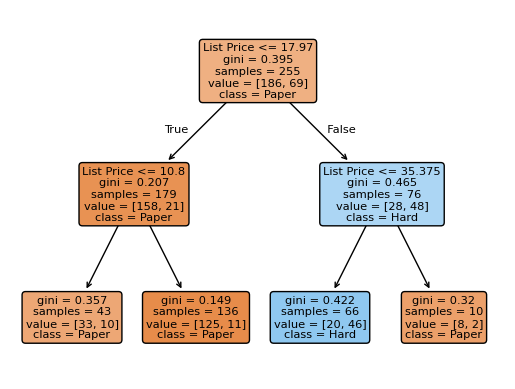

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=['Paper', 'Hard'],
    filled=True,
    rounded=True
)



Features used during clf training: ['List Price']
Features used during clf2 training: ['NumPages' 'Thick' 'List Price']


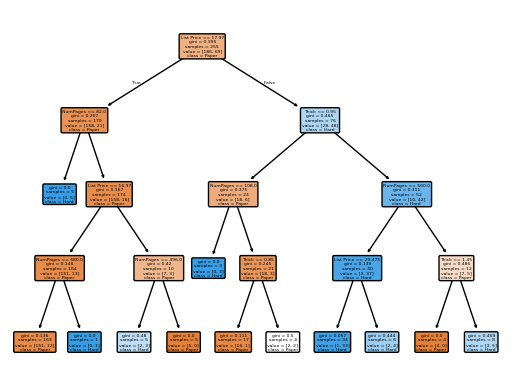

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

b = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
a = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(a, b)

plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paper', 'Hard'],
    filled=True,
    rounded=True
)

print("Features used during clf training:", clf.feature_names_in_)
print("Features used during clf2 training:", clf2.feature_names_in_)


Metrics for clf:
Accuracy: 0.875, Sensitivity: 0.765, Specificity: 0.915

Metrics for clf2:
Accuracy: 0.766, Sensitivity: 0.529, Specificity: 0.851


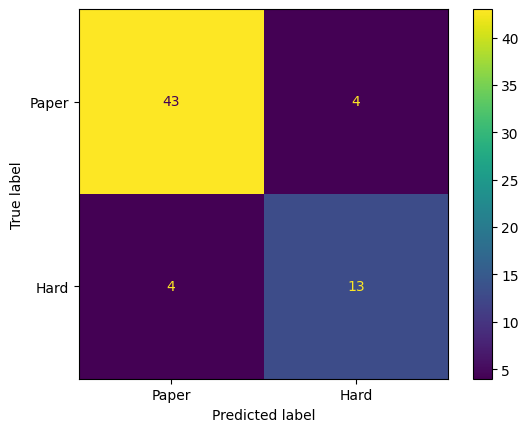

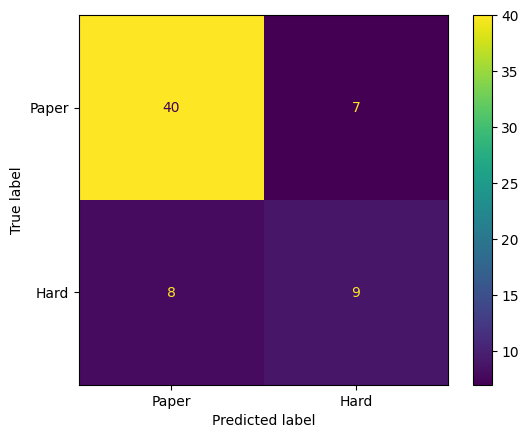

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H'] 

X_test_clf = ab_reduced_noNaN_test[['List Price']]  
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]


y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

def calculate_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    return np.round(accuracy, 3), np.round(sensitivity, 3), np.round(specificity, 3)

accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(cm_clf)

accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(cm_clf2)

print("Metrics for clf:")
print(f"Accuracy: {accuracy_clf}, Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}")

print("\nMetrics for clf2:")
print(f"Accuracy: {accuracy_clf2}, Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}")

ConfusionMatrixDisplay(cm_clf, display_labels=["Paper", "Hard"]).plot()
ConfusionMatrixDisplay(cm_clf2, display_labels=["Paper", "Hard"]).plot()


<h2>Question 6:</h2>
Metrics for clf:<br>
Accuracy: 0.875, Sensitivity: 0.765, Specificity: 0.915<br>

Metrics for clf2:<br>
Accuracy: 0.766, Sensitivity: 0.529, Specificity: 0.851<br>

<h2>Question 7:</h2>
These confusion matricies are using training data, while the ones I created use test data. Using test data over training data is much better due to the fact that test data ensures a fair evaluation on how well the model is performing. Using training data will cause the model to overfit, as it has already seen and has been trained on that data, while my use of test data reports the most unbiased performance

<h2>Chatbot Summary:</h2>
Here's a summary of our chat:

Metrics for Classification:

You explored accuracy, sensitivity, specificity, and precision, including real-world examples (e.g., medical tests, fraud detection, spam filtering) and their relevance based on context.
We discussed how to interpret these metrics in practice (e.g., sensitivity of 60%) and their use cases, emphasizing the trade-offs and importance of context.
Accuracy vs. Precision:

A detailed comparison was provided, highlighting when to prioritize accuracy (overall performance, balanced datasets) vs. precision (avoiding false positives, critical in fraud or medical screening).
Splitting Data with DataFrame.sample:

You learned how to split data into training (80%) and testing (20%) sets using pandas DataFrame.sample with reproducibility through random_state.
Decision Tree Classifier Data Preparation:

We analyzed a code snippet where:
The target variable (y) was derived using one-hot encoding (pd.get_dummies) to classify whether a book is hardcover.
The feature matrix (X) used the List Price column for predictions.
Explained how the data setup relates to training a decision tree classifier using scikit-learn.
Let me know if you'd like to dive deeper into any topic!